https://srprinz.github.io/CMPS3160_Final/

https://github.com/srprinz/CMPS3160_Final

&emsp;&emsp;For our Final Tutorial, I, Annie Donahue, and Shay Prinz, will be working together. We are planning on working with 911 call data from the years 2019 and 2020, and possibly looking backwards to earlier years if it seems necessary, or if we have the time. We would like to manipulate this data to be able to see how different events/phenomena affect either peoples’ ability to call 911, or their willingness to. 

&emsp;&emsp;For example, we would like to see what the data can tell us about pre-COVID19 911 calls, vs. post COVID19, by comparing the data March of 2020 with April of 2020, and then using March and April 2019 and 2018 as a control factor to see if anything changed. We were also thinking about looking at the 911 call data during times of civil unrest where there was a prominent anti-police sentiment in the U.S. Right now, for example, it would be interesting to see if less people are calling the police as protests calling for police abolishment continue across the country. This data can tell us a lot about the current state of New Orleans as a whole as we will be able to see both crime reporting data and 911 calls related to health issues. These datasets encompass a lot of information, and it may be difficult to filter it in a way that will be easier and more digestible so as to see the true effects of the various events we are trying to center our analysis around.
    
&emsp;&emsp;A specific challenge Shay came across when transforming the data was converting from string to datetime. Due to how large this dataset is, it was taking over 10 minutes to complete the conversion. This is because pandas uses dateutil.parser.parse for parsing the strings when it has a non-default format or when no format string is supplied. I was able to speed up the process a bit by adding the parameter "infer_datetime_format=True".
    
&emsp;&emsp;We are planning on meeting once a week as a starting point, so as to gauge how much we can get done in one sitting, and make sure we are on a good pace to be able to complete our tutorial in the semester. If need be, we will move up to meeting multiple times a week, especially as we get closer to the end of the semester. Mostly, we will be completing our work on GitHub, and then using the weekly meeting to make a timeline for the next week, and set goals and checkpoints to accomplish before the next time we meet, as well as check in on each others progress and make sure our code and our analyses are compatible. 
    
&emsp;&emsp;We would like to plan at least one big goal to accomplish for each week, which is a hard deadline for us both, as well as a stretch goal that we would ideally get done before the next week, but could be moved up to the next week if it became clear that we didn’t have enough time during that week. This is so as to keep us on a steady track, but also work with both of our busy schedules is knowing that there are some weeks where we may have more time and be able to get  larger bulk of things done, but even in our busier weeks, we would have to get the set goal done, keeping us on a steady movement towards completing the project. Ideally, our weeks will work around Thursdays, as since we are in the service learning portion of the class, we would like to be able to check in during those times with updates to our service learning partner and our class. 

### 2018 911 Calls Dataset

In [48]:
import pandas as pd
Calls2018_df = pd.read_csv("../Calls_for_Service_2018.csv",low_memory=False)

In [49]:
#Tidy data by dropping columns that won't be used (NOPD_Item, MapX, MapY, TimeClosed, Beat, Location)
del Calls2018_df['NOPD_Item']
del Calls2018_df['MapX']
del Calls2018_df['MapY']
del Calls2018_df['TimeClosed']
del Calls2018_df['Beat']

In [50]:
Calls2018_df[['Latitude','Longitude']] = Calls2018_df.Location.str.split(",",expand=True) 
#Remove location column
del Calls2018_df['Location']
#Strip parentheses from left and right side
Calls2018_df['Latitude'] = Calls2018_df['Latitude'].replace(to_replace='\(', value="", regex=True)
Calls2018_df['Longitude'] = Calls2018_df['Longitude'].replace(to_replace='\)', value="", regex=True)

In [51]:
#Convert TimeCreate, TimeDispatch, and TimeArrival to datetime
Calls2018_df['TimeCreate'] = pd.to_datetime(Calls2018_df['TimeCreate'],infer_datetime_format=True)
Calls2018_df['TimeDispatch'] = pd.to_datetime(Calls2018_df['TimeDispatch'],infer_datetime_format=True)
Calls2018_df['TimeArrive'] = pd.to_datetime(Calls2018_df['TimeArrive'],infer_datetime_format=True)
#Remove all rows with years that are not 2019
Calls2018_df = Calls2018_df[(Calls2018_df['TimeCreate'].dt.year == 2018)]
#replace missing data
Calls2018_df.head()

,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,Disposition,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Latitude,Longitude
0,67C,THEFT FROM EXTERIOR,1A,62C,SIMPLE BURGLARY VEHICLE,1G,2018-01-17 16:10:29,2018-01-18 02:21:51,2018-01-18 02:34:08,GOA,GONE ON ARRIVAL,N,147XX Chef Menteur Hwy,NaN,0,NaN,NaN
1,103,DISTURBANCE (OTHER),1C,35,SIMPLE BATTERY,1F,2018-01-25 20:26:48,2018-01-26 00:07:09,2018-01-26 00:10:34,RTF,REPORT TO FOLLOW,N,063XX Stratford Pl,70131.0,4,29.9123282,-89.98715446
2,18,TRAFFIC INCIDENT,1J,18,TRAFFIC INCIDENT,1J,2018-01-09 01:00:19,2018-01-09 01:01:47,2018-01-09 01:00:19,NAT,Necessary Action Taken,Y,Bourbon St & Iberville St,NaN,0,NaN,NaN
3,37,AGGRAVATED ASSAULT,1C,103,DISTURBANCE (OTHER),2A,2018-01-08 01:24:10,2018-01-08 01:25:23,2018-01-08 01:28:28,RTF,REPORT TO FOLLOW,N,007XX Bourbon St,NaN,0,NaN,NaN
4,63,PROWLER,1A,63,PROWLER,2E,2018-01-25 20:26:53,NaT,NaT,DUP,DUPLICATE,N,006XX N Rampart St,70112.0,1,29.96024903,-90.06907651


### 2019 911 Calls Dataset

In [52]:
Calls2019_df = pd.read_csv("../Calls_for_Service_2019.csv",low_memory=False)

In [53]:
#Tidy data by dropping columns that won't be used (NOPD_Item, MapX, MapY, TimeClosed, Beat, Location)
del Calls2019_df['NOPD_Item']
del Calls2019_df['MapX']
del Calls2019_df['MapY']
del Calls2019_df['TimeClosed']
del Calls2019_df['Beat']

In [54]:
Calls2019_df[['Latitude','Longitude']] = Calls2019_df.Location.str.split(",",expand=True) 
#Remove location column
del Calls2019_df['Location']
#Strip parentheses from left and right side
Calls2019_df['Latitude'] = Calls2019_df['Latitude'].replace(to_replace='\(', value="", regex=True)
Calls2019_df['Longitude'] = Calls2019_df['Longitude'].replace(to_replace='\)', value="", regex=True)

In [55]:
#Calls2019_df.dtypes
#Convert TimeCreate, TimeDispatch, and TimeArrival to datetime
Calls2019_df['TimeCreate'] = pd.to_datetime(Calls2019_df['TimeCreate'],infer_datetime_format=True)
Calls2019_df['TimeDispatch'] = pd.to_datetime(Calls2019_df['TimeDispatch'],infer_datetime_format=True)
Calls2019_df['TimeArrival'] = pd.to_datetime(Calls2019_df['TimeArrival'],infer_datetime_format=True)
#Remove all rows with years that are not 2019
Calls2019_df = Calls2019_df[(Calls2019_df['TimeCreate'].dt.year == 2019)]
#replace missing data
Calls2019_df.head()

,Type,TypeText,Priority,TimeCreate,TimeDispatch,TimeArrival,Disposition,DispositionText,InitialType,InitialTypeText,InitialPriority,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Latitude,Longitude
0,22A,AREA CHECK,1K,2019-04-30 00:21:44,2019-04-30 00:21:44,2019-04-30 00:21:44,NAT,Necessary Action Taken,22A,AREA CHECK,1K,Y,W Harrison Ave & Bellaire Dr,70124,3,30.00592151,-90.12148943
1,100,HIT & RUN,1G,2019-05-21 09:42:41,2019-05-21 10:35:28,2019-05-21 11:01:40,RTF,REPORT TO FOLLOW,20,AUTO ACCIDENT,1E,N,I-10 E & Bullard Ave,70128,7,30.04605199,-89.96117169
2,103D,DOMESTIC DISTURBANCE,2C,2019-05-26 18:06:30,2019-05-26 18:06:30,2019-05-26 18:06:30,RTF,REPORT TO FOLLOW,103D,DOMESTIC DISTURBANCE,2C,Y,014XX Blk N Claiborne Ave,70116,1,29.96972427,-90.06804479
3,21,COMPLAINT OTHER,1J,2019-05-27 08:31:22,2019-05-27 08:56:11,2019-05-27 09:01:23,RTF,REPORT TO FOLLOW,107,SUSPICIOUS PERSON,2C,N,067XX Tara Ln,70127,7,30.02920606,-89.98412043
4,100,HIT & RUN,1G,2019-05-27 10:48:20,2019-05-27 12:03:40,2019-05-27 12:10:19,RTF,REPORT TO FOLLOW,100,HIT & RUN,1G,N,Dumaine St & N Claiborne Ave,70116,1,29.96548069,-90.07182503


This dataset reflects incidents that have been reported to the New Orleans Police Department in 2020. Data is provided by Orleans Parish Communication District (OPCD), the administrative office of 9-1-1 for the City of New Orleans.

### 2020 911 Calls Dataset

In [56]:
Calls2020_df = pd.read_csv("../Call_for_Service_2020.csv")

In [57]:
#Tidy data by dropping columns that won't be used (NOPD_Item, MapX, MapY, TimeClosed, Beat, Location)
del Calls2020_df['NOPD_Item']
del Calls2020_df['MapX']
del Calls2020_df['MapY']
del Calls2020_df['TimeClosed']
del Calls2020_df['Beat']


In [58]:
#Clean up location column to get Latitude and Longitude columns
Calls2020_df['Location'] = Calls2020_df['Location'].replace(to_replace='POINT ', value="", regex=True)
Calls2020_df[['Longitude','Latitude']] = Calls2020_df.Location.str.split(" ",expand=True)
#Remove location column
del Calls2020_df['Location']
#Strip parentheses from left and right side
Calls2020_df['Longitude'] = Calls2020_df['Longitude'].replace(to_replace='\(', value="", regex=True)
Calls2020_df['Latitude'] = Calls2020_df['Latitude'].replace(to_replace='\)', value="", regex=True)

In [59]:
#Calls2020_df.dtypes
#Convert TimeCreate, TimeDispatch, and TimeArrive to datetime
Calls2020_df['TimeCreate'] = pd.to_datetime(Calls2020_df['TimeCreate'],infer_datetime_format=True)
Calls2020_df['TimeDispatch'] = pd.to_datetime(Calls2020_df['TimeDispatch'],infer_datetime_format=True)
Calls2020_df['TimeArrive'] = pd.to_datetime(Calls2020_df['TimeArrive'],infer_datetime_format=True)

#replace missing data
Calls2020_df.head()

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,Disposition,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Longitude,Latitude
0,94F,FIREWORKS,1A,103,DISTURBANCE (OTHER),1C,2020-01-01 00:00:34,2020-01-01 02:34:18,NaT,NAT,Necessary Action Taken,N,001XX Blk Riviera Ave,70122,3,-90.0808922,30.0086791
1,21,COMPLAINT OTHER,1J,21,COMPLAINT OTHER,1J,2020-01-01 00:00:42,2020-01-01 00:00:42,2020-01-01 00:00:42,NAT,Necessary Action Taken,Y,034XX Broadway St,70125,2,-90.10840522,29.95996774
2,94F,FIREWORKS,1A,94F,FIREWORKS,2J,2020-01-01 00:01:05,2020-01-01 01:49:42,2020-01-01 02:08:17,NAT,Necessary Action Taken,N,026XX Banks St,70119,1,-90.08872937,29.96246347
3,94,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,2020-01-01 00:02:50,2020-01-01 00:02:54,2020-01-01 00:09:13,GOA,GONE ON ARRIVAL,N,Kerlerec St & N Robertson St,70116,1,-90.0669267,29.96960271
4,94F,FIREWORKS,1A,94F,FIREWORKS,2J,2020-01-01 00:03:46,2020-01-01 00:34:36,NaT,NAT,Necessary Action Taken,N,053XX Memphis St,70124,3,-90.10813674,29.98517428


A challenge I came across when transforming the data was converting from string to datetime.  Due to how large this dataset is, it was taking over 10 minutes to complete the conversion.  This is because pandas uses dateutil.parser.parse for parsing the strings when it has a non-default format or when no format string is supplied. I was able to speed up the process a bit by adding the parameter "infer_datetime_format=True".

### Number of passengers deplaned (arriving) at MSY Airport by Month for March 2018- August 2020

A challenge we knew we were going to face was the issue of population swelling. Due to coronavirus, we knew there would be a significant decrease in New Orleans population due to cancellation of tourist events and restrictions on travel.  To try to estimate populations during each month, we have collected data on number of passengers arriving at MSY airport during each month from March 2018 - August 2020 (as far as data would go).  We will merge this data with our 911 calls data so we can calculate 911 calls per 100,000 people. This should make our data analysis more realistic and account for unequal population sizes.

In [60]:
Air_arrivals = pd.read_csv("../arrivals_data.csv")
Air_arrivals

,Month,Arrivals 2018,Arrivals 2019,Arrivals 2020,Pop 2018,Pop 2019,Pop 2020,Total Pop 2018,Total Pop 2019,Total Pop 2020
0,March,604666,640901,326227,391006,391044,390028,995672,1031945,716255
1,Apr,595906,586796,14421,391006,391044,390028,986912,977840,404449
2,May,566970,612886,43070,391006,391044,390028,957976,1003930,433098
3,June,555182,577194,96644,391006,391044,390028,946188,968238,486672
4,July,559059,545767,157645,391006,391044,390028,950065,936811,547673
5,Aug,509903,529846,391044,391006,391044,390028,900909,920890,781072


### COVID-19 Cases Per Day in Louisiana Dataset

In [61]:
LA_cases = pd.read_csv("../louisiana-history.csv")
data = {'Date': LA_cases['date'], 
        'Cases per day': LA_cases['positiveIncrease']
       } 
  
# Convert the dictionary into DataFrame 
LA_cases_by_day = pd.DataFrame(data) 
LA_cases_by_day['Date'] = pd.to_datetime(LA_cases_by_day['Date'],infer_datetime_format=True)
LA_cases_by_day = LA_cases_by_day.set_index('Date')
LA_cases_by_day.head()

,Cases per day
Date,
2020-11-14,0
2020-11-13,3450
2020-11-12,3829
2020-11-11,0
2020-11-10,1330


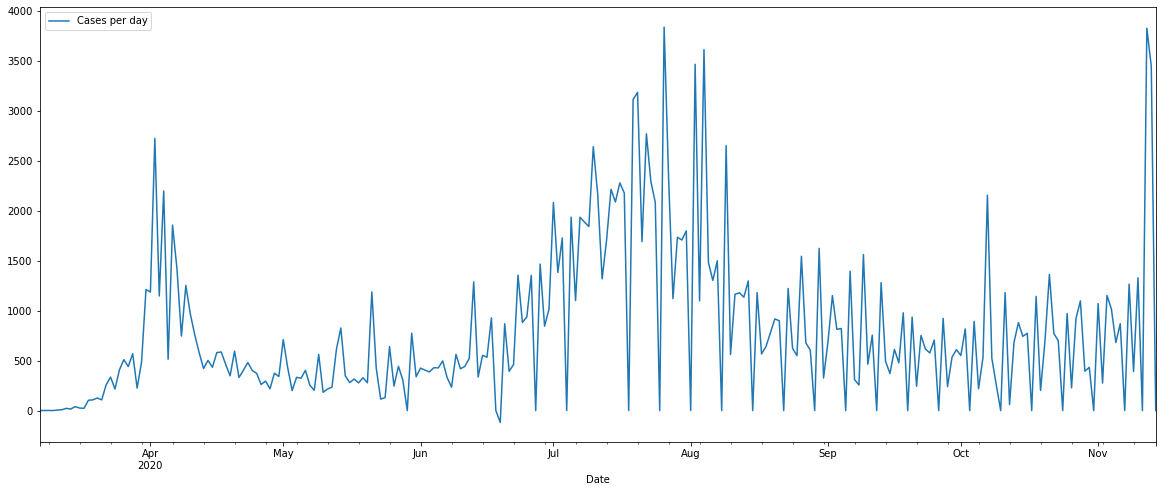

In [62]:
LA_cases_by_day.plot(figsize = (20,8))

Trends: spikes Highest spikes in April, July, November

### Graph to show number of 911 calls per month for 2018, 2019, 2020

In [63]:
Calls2018_df = Calls2018_df.copy()
Calls2018_df = Calls2018_df.rename(columns={'TimeArrive': 'TimeArrival'})
Calls2018_df['Year'] = Calls2018_df['TimeCreate'].dt.year
Calls2018_df['Date'] = Calls2018_df['TimeCreate'].dt.date
Calls2018_df['Month'] = Calls2018_df['TimeCreate'].dt.month
CallsbyMonth2018 = Calls2018_df[Calls2018_df['Month'] <= 8]
CallsbyMonth2018 = Calls2018_df[Calls2018_df['Month'] >= 3]

Calls2019_df = Calls2019_df.copy()
Calls2019_df['Year'] = Calls2019_df['TimeCreate'].dt.year
Calls2019_df['Date'] = Calls2019_df['TimeCreate'].dt.date
Calls2019_df['Month'] = Calls2019_df['TimeCreate'].dt.month
CallsbyMonth2019 = Calls2019_df[Calls2019_df['Month'] <= 8]
CallsbyMonth2019 = Calls2019_df[Calls2019_df['Month'] >= 3]

Calls2020_df = Calls2020_df.copy()
Calls2020_df = Calls2020_df.rename(columns={'TimeArrive': 'TimeArrival'})
Calls2020_df['Year'] = Calls2020_df['TimeCreate'].dt.year
Calls2020_df['Date'] = Calls2020_df['TimeCreate'].dt.date
Calls2020_df['Month'] = Calls2020_df['TimeCreate'].dt.month
CallsbyMonth2020 = Calls2020_df[Calls2020_df['Month'] <= 8]
CallsbyMonth2020 = Calls2020_df[Calls2020_df['Month'] >= 3]

CallsbyMonth = CallsbyMonth2018.append(CallsbyMonth2019)
CallsbyMonth = CallsbyMonth.append(CallsbyMonth2020)
CallsbyMonth = CallsbyMonth.reset_index()
CallsbyMonth["Month"] = CallsbyMonth["Month"].map({

       3: "March",
       4: "Apr",
       5: "May",
       6: "June",
       7: "July",
       8: "Aug",

})

CallsbyMonth.head()


,index,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrival,...,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Latitude,Longitude,Year,Date,Month,Type
0,6,103M,MENTAL PATIENT,2C,103M,MENTAL PATIENT,2C,2018-06-08 02:53:47,2018-06-08 02:54:30,2018-06-08 02:55:53,...,N,018XX Magnolia St,70113,6,0.0,0.0,2018,2018-06-08,June,NaN
1,7,24,MEDICAL,2D,24,MEDICAL,2D,2018-03-20 02:36:24,2018-03-20 02:36:24,2018-03-20 02:36:24,...,Y,XX Dreyfous Dr,70119,3,0.0,0.0,2018,2018-03-20,March,NaN
2,9,24,MEDICAL,2D,24,MEDICAL,2D,2018-08-04 02:51:50,2018-08-04 02:51:50,2018-08-04 02:51:50,...,Y,Bourbon St & Saint Peter St,70112,8,0.0,0.0,2018,2018-08-04,Aug,NaN
3,12,24,MEDICAL,1A,24,MEDICAL,2D,2018-05-24 06:30:27,NaT,NaT,...,N,066XX Lake Willow Dr,70126,7,0.0,0.0,2018,2018-05-24,May,NaN
4,14,103,DISTURBANCE (OTHER),2A,103,DISTURBANCE (OTHER),1C,2018-08-26 05:39:53,NaT,NaT,...,N,City Park,NaN,0,0.0,0.0,2018,2018-08-26,Aug,NaN


In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

result = CallsbyMonth.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')

In [65]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [66]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

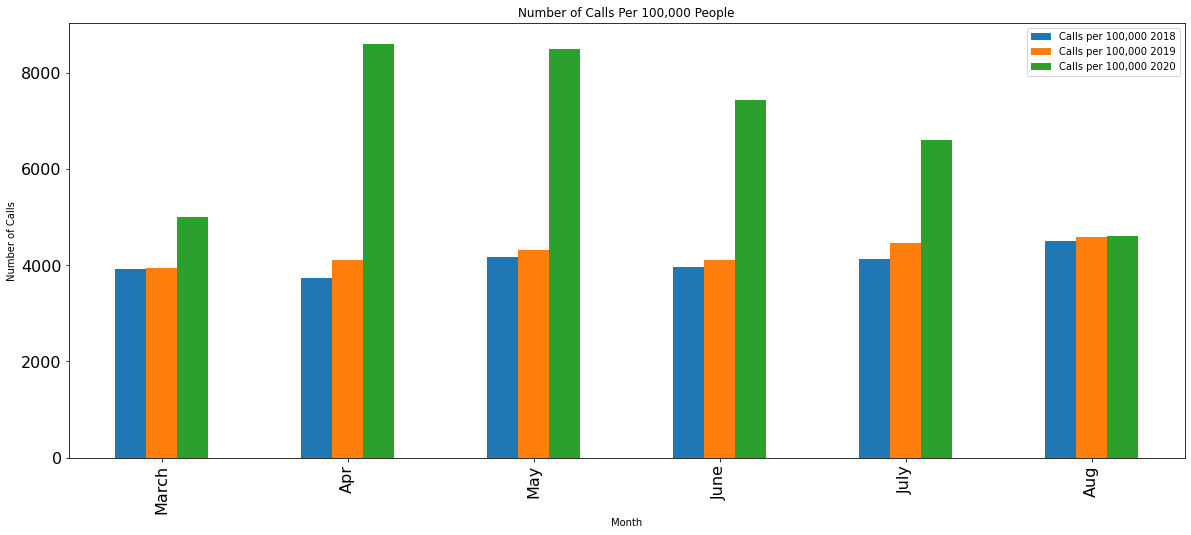

In [67]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Number of Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

This graph shows the number of calls made per 100,000 people in the months of March through August in 2018, 2019, and 2020.  As we predicted, more calls were made per 100,000 people during the spikes of the pandemic.  Things do even out in August though, as restricitions are lifted.

### Top 10 Types of 911 Calls in April 2019

In [68]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [69]:
TopCalls_2018 = CallsbyMonth2018.loc[ 
                                 (CallsbyMonth2018['TypeText'] != 'AREA CHECK') 
                                 & (CallsbyMonth2018['TypeText'] != 'BUSINESS CHECK')
                                 & (CallsbyMonth2018['TypeText'] != 'COMPLAINT OTHER') 
                                 & (CallsbyMonth2018['TypeText'] != 'RETURN FOR ADDITIONAL INFO')
                                & (CallsbyMonth2018['TypeText'] != 'DISTURBANCE (OTHER)')]
TopCalls_2018 = TopCalls_2018['TypeText'].value_counts()[:10].rename_axis('2018').to_frame('counts')

TopCalls_2019 = CallsbyMonth2019.loc[
                                 (CallsbyMonth2019['TypeText'] != 'AREA CHECK') 
                                 & (CallsbyMonth2019['TypeText'] != 'BUSINESS CHECK')
                                 & (CallsbyMonth2019['TypeText'] != 'COMPLAINT OTHER') 
                                 & (CallsbyMonth2019['TypeText'] != 'RETURN FOR ADDITIONAL INFO')
                                & (CallsbyMonth2019['TypeText'] != 'DISTURBANCE (OTHER)')]
TopCalls_2019 = TopCalls_2019['TypeText'].value_counts()[:10].rename_axis('2019').to_frame('counts')

TopCalls_2020 = CallsbyMonth2020.loc[
                                 (CallsbyMonth2020['TypeText'] != 'AREA CHECK') 
                                 & (CallsbyMonth2020['TypeText'] != 'BUSINESS CHECK')
                                 & (CallsbyMonth2020['TypeText'] != 'COMPLAINT OTHER') 
                                 & (CallsbyMonth2020['TypeText'] != 'RETURN FOR ADDITIONAL INFO')
                                & (CallsbyMonth2020['TypeText'] != 'DISTURBANCE (OTHER)')]
TopCalls_2020 = TopCalls_2020['TypeText'].value_counts()[:10].rename_axis('2020').to_frame('counts')

display_side_by_side(TopCalls_2018,TopCalls_2019,TopCalls_2020)

,counts
2018,
TRAFFIC INCIDENT,33946
"BURGLAR ALARM, SILENT",19611
WARR STOP WITH RELEASE,14585
AUTO ACCIDENT,12851
SUSPICIOUS PERSON,12735
DOMESTIC DISTURBANCE,10197
HIT & RUN,7092
MEDICAL,6833
MUNICIPAL ATTACHMENT,5724


The tables above show the top types of calls made in 2018, 2019, and 2020.  It does not appear they vary too greatly.  However, we can see tthat traffic incidents are not a top call in 2020 while public gatherings and mental patient are.  We can be sure that public gatherings is a result of the pandemic.  We can speculate that mental patient is now a top call in 2020 due the depressing reality that is lockdown and disease; however, that is purely speculation.

### Map of Locations of 911 Calls for Public Gatherings in April 2020

In [70]:
!pip install folium

In [71]:
import folium

In [72]:
April2020 = CallsbyMonth2020.loc[(CallsbyMonth2020['Month'] == 4)& (CallsbyMonth2020['TypeText'] == 'PUBLIC GATHERING')]
locations = April2020[['Latitude', 'Longitude']].dropna()
locationlist = locations.values.tolist()
len(locationlist)

1442

In [73]:
from folium.plugins import FastMarkerCluster

NOLA_location = [29.951065, -90.071533 ]

m = folium.Map(location=NOLA_location,
               zoom_start=15,
               tiles='openstreetmap')

m.add_child(FastMarkerCluster(locationlist, name='2020'))


Looking deeper into this new type of call about Public Gatherings, this visualization shows calls placed about Public Gatherings (608 calls) in April 2020.  Notice the areas with higher number of calls, such as Mid City and Uptown - near Tulane's Campus.

### Number of Domestic Assault Calls

In [74]:
DomesticAssault = CallsbyMonth.loc[(CallsbyMonth['TypeText'] == 'AGGRAVATED ASSAULT DOMESTIC')|(CallsbyMonth['TypeText'] == 'SIMPLE ASSAULT DOMESTIC')
                               |(CallsbyMonth['TypeText'] == 'CRIMINAL DAMAGE DOMESTIC')|(CallsbyMonth['TypeText'] == 'CRIMINAL MISCHIEF DOMESTIC') 
                                 |(CallsbyMonth['TypeText'] == 'AGGRAVATED BATTERY DOMESTIC')|(CallsbyMonth['TypeText'] == 'SIMPLE BATTERY DOMESTIC')  ]
result = DomesticAssault.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')


In [75]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [76]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

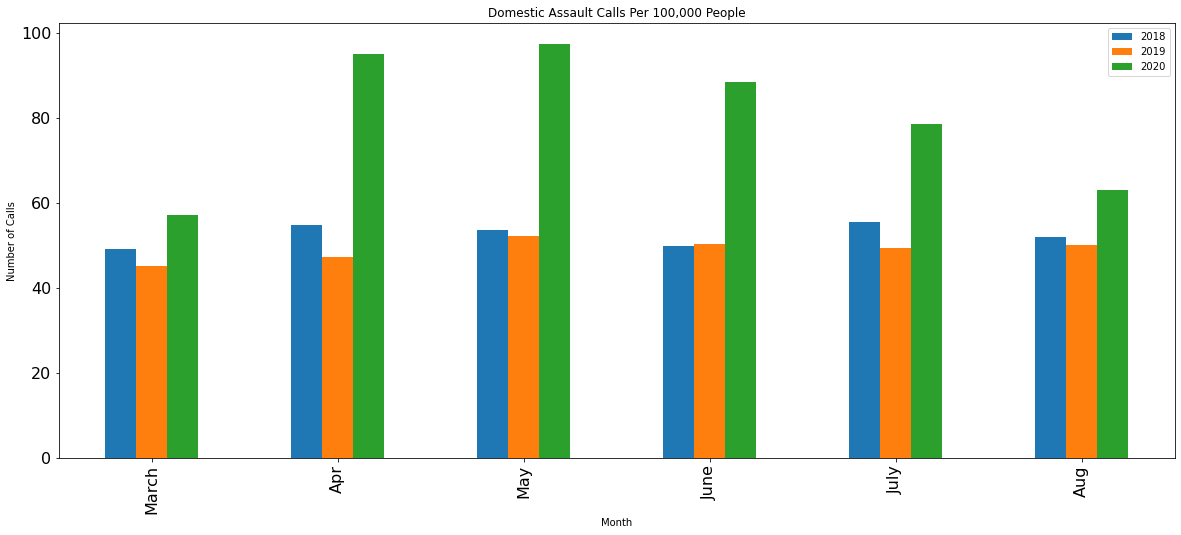

In [77]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Domestic Assault Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
ax.legend(['2018','2019','2020'])

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

A hypothesis of ours was a possible increase in domestic assault due to mandatory lockdowns at the beginning of the coronavirus spread...this is actually not something we saw in all the months.  We hypothesized this based on the idea that some people may be forced to lockdown in abusive households.  This data suggests that there was an increase in domestic assault and violence.  This suggestion is important because it can help us put out more resources regarding domestic violence now that we see the problem has exacerbated during the pandemic.

### Violent Crime 2019 vs. 2020

In [78]:
ViolentCrime = CallsbyMonth[CallsbyMonth['TypeText'].str.contains("RAPE")|CallsbyMonth['TypeText'].str.contains("ASSAULT")
                            |CallsbyMonth['TypeText'].str.contains("BATTERY")]
result = ViolentCrime.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')

In [79]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [80]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

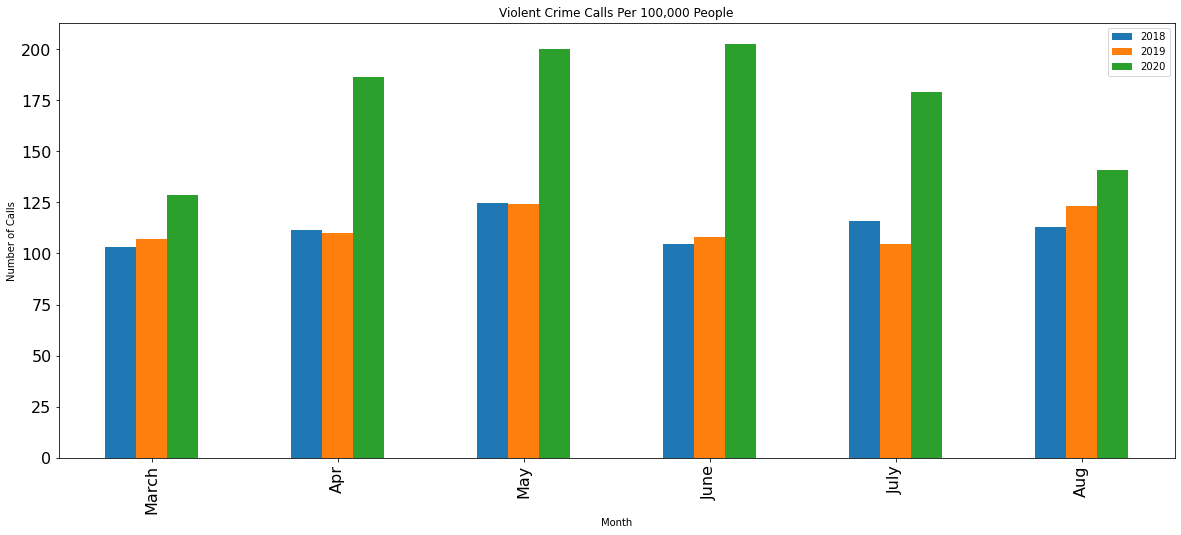

In [81]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Violent Crime Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
ax.legend(['2018','2019','2020'])

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

A hypothesis of ours was a possible decrease in violent crime due to mandatory lockdowns at the beginning of the coronavirus spread.  This data suggest that we are incorrect and that there are more violent crime reports overall in 2020 per 100,000 people.  We can only speculate as to why, but the pandemic introduces a lot of new factors such as loss of employment, mental health issues, and lockdowns. In Aguust, a time where Louisiana moved to Phase 3 and less strict restrictions regarding coronavirus were imposed, we see things start to even out in comparison with 2018 and 2019.  Our data suggests that coronavirus is correlated with more violent crime.

### Number of Traffic Incident Calls

In [82]:
TrafficIncidents = CallsbyMonth.loc[(CallsbyMonth['TypeText'] == 'TRAFFIC INCIDENT')]
result = TrafficIncidents.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')

In [83]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [84]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

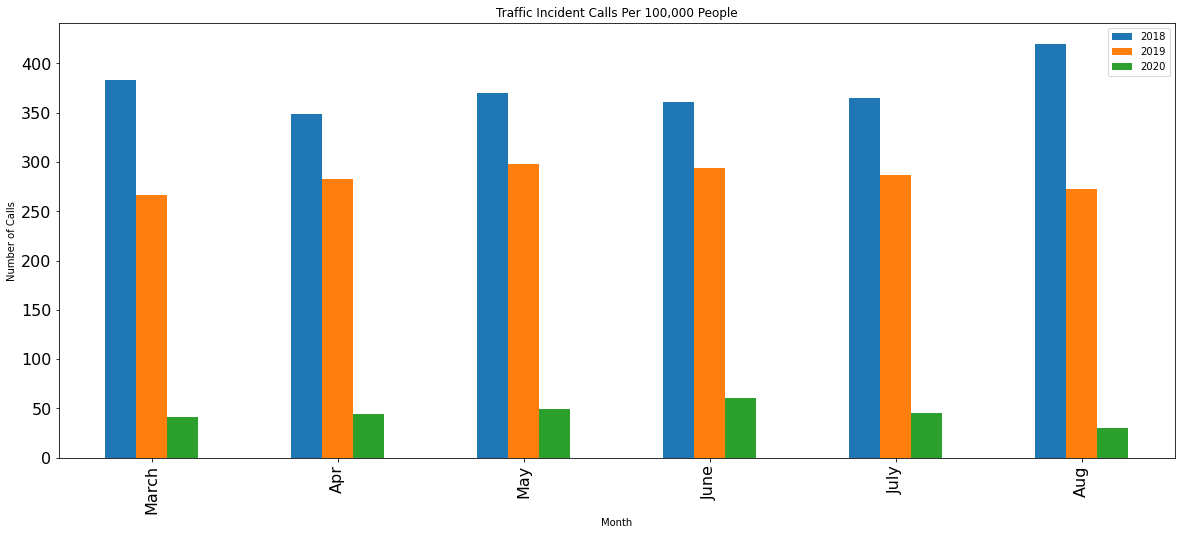

In [85]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Traffic Incident Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
ax.legend(['2018','2019','2020'])

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

We hypothesized that traffic incidents would decreased during lockdown due to the most parsimonious explanation that less people would be on the road due to lockdowns.  Our hypothesis turned out to be true for all months.  We were surpised that traffic incident calls did not increase as restrictions began to be lifted in August though.  But, it is important to note that many people still work from home at this time.

### Number of Suicide Calls

In [86]:
Suicide = CallsbyMonth.loc[(CallsbyMonth['TypeText'] == 'SUICIDE')]
result = Suicide.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')

In [87]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [88]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

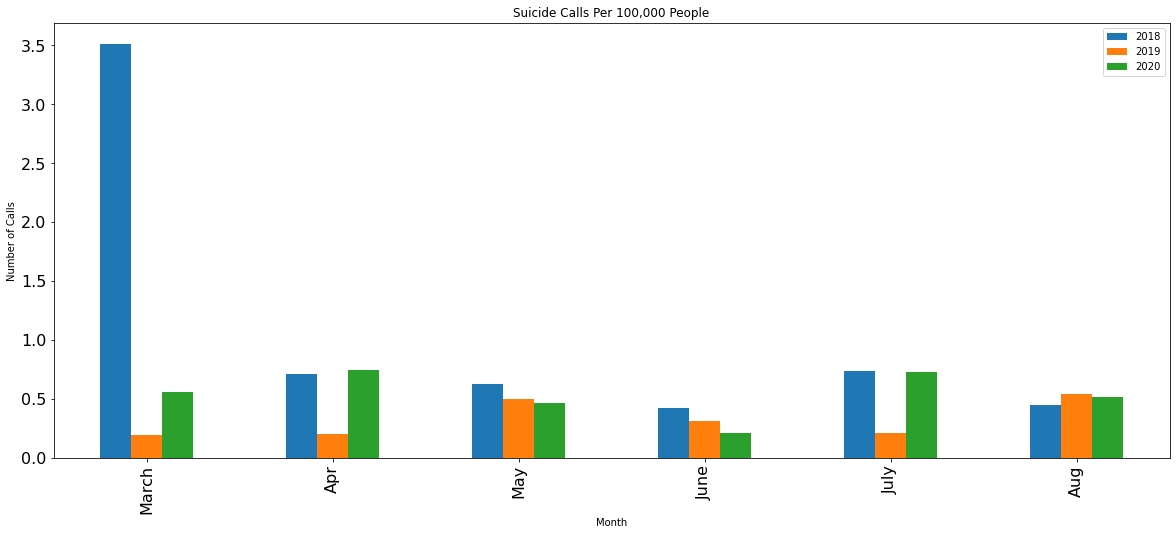

In [89]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Suicide Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
ax.legend(['2018','2019','2020'])

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

Some positive findings: we do not see an increase in calls reporting suicides.  In fact, aside from March 2018, trends seem to remain fairly even between the past two years.

### Number of Homelessness Calls

In [90]:
Homelessness = CallsbyMonth.loc[(CallsbyMonth['TypeText'] == 'HOMELESS')]
result = Homelessness.pivot_table(index='Month', 
                        columns='Year', values='TypeText', aggfunc='count')


In [91]:
flattened = pd.DataFrame(result.to_records())
std_number_calls = flattened.merge(Air_arrivals, on='Month')

In [92]:
std_number_calls['Calls per 100,000 2018'] = (std_number_calls['2018']/std_number_calls['Total Pop 2018'])*100000
std_number_calls['Calls per 100,000 2019'] = (std_number_calls['2019']/std_number_calls['Total Pop 2019'])*100000
std_number_calls['Calls per 100,000 2020'] = (std_number_calls['2020']/std_number_calls['Total Pop 2020'])*100000

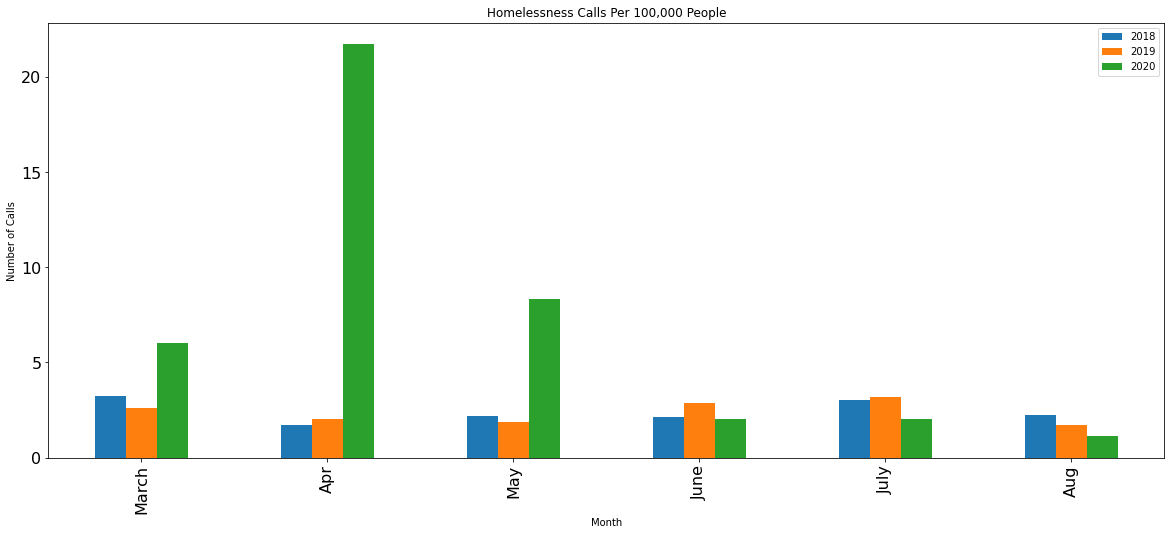

In [93]:
result = std_number_calls.pivot_table(index='Month', 
                                      values=['Calls per 100,000 2018',
                                              'Calls per 100,000 2019',
                                              'Calls per 100,000 2020'])

monthOrder = ['March', 'Apr', 'May', 'June', 'July', 'Aug']
ax = result.loc[monthOrder].plot(kind="bar", legend=True, 
                                 title ="Homelessness Calls Per 100,000 People", figsize=(20, 8), fontsize=16)
ax.legend(['2018','2019','2020'])

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.show()

Lastly, due to the increased the sheer nature of the virus and economic downfall, we predicted more calls reporting homelessness.  Even with the population in New Orleans shrinking in 2020 due to lack of tourism and travel, we still see significantly more calls at In March, April and May, at the height of lockdowns and during the first spike of the pandemic.

### Summary and Challenges

Our main challenge revolved around the issue that we may be comparing unequal sizes of population in 2018, 2019 and 2020.  Due to this, we chose to standardize our populations by analyzing calls per 100,000 people.  We did this by estimating a total population per month by adding New Orlean's total population each year to the number of arrivals at MSY airport each month. 

Coronavirus is correlated with a higher number of 911 calls. 

Data on domestic assault calls accepts our hypothesis that lockdowns would increase domestic assault. [A study also found X-ray evidence points to pandemic lockdowns triggering a surge in cases of domestic violence.](https://www.webmd.com/lung/news/20200818/radiology-study-suggests-horrifying-rise-in-domestic-violence-during-pandemic#1).

More violent crime was reported at the height of coronavirus and lockdowns.  Although it is important to keep in mind that a possible confound here could be police violence, rioting, and protests. [Reference](https://www.cnn.com/2020/08/16/us/violent-crime-soars-confidence-in-police-takes-hit/index.html) that supports this.

Less traffic incidents during the lockdowns and overall throughout the pandemic.

No significant changes in Suicide Calls.
 
More reports of homelessness at the height of pandemic. [Reference](https://www.npr.org/2020/08/10/900766719/millions-of-americans-are-in-danger-of-being-evicted-during-pandemic) that supports this.

And of course, a new whole new 911 call category reporting public gatherings!